# Fe-Ni-Ti (De Keyzer 2009)

## Run feasibility tests on a ternary system with a plot


Imports

In [1]:
import os
import matplotlib.pyplot as plt
from pycalphad import Database, variables as v
from analysis_runner import run_simulation, plot_figure, EquilibriumSamplingPointsGenerator

T_liquid = 2200  # temperature where everything is liquid
potentials = {v.N: 1, v.T: (1000, T_liquid, 10), v.P: 101325}  # for equilibrium calculations
ngridpts = 41  # number of points along each dimension of the composition grid
tolerance_deleterious_phases = 0.10  # Maximum tolerance for deleterious phases
OUTDIR = 'figures'

# Global setup
plt.style.use('papers.mplstyle')
try:
    os.mkdir(OUTDIR)
except FileExistsError:
    pass


In [2]:
dbf = Database(os.path.join('..', 'databases', 'Fe-Ni-Ti_dekeyzer2009.tdb'))
comps = ['FE', 'NI', 'TI', 'VA']
phases = list(dbf.phases.keys())
allowed_phases = ['LIQUID', 'A2', 'A1', 'A3']  # phases that are okay to have (non-deleterious)
liquid_phase_name = 'LIQUID'

from analysis_runner import PointsGenerator, ArrayLike, Dict, _get_indep_comps, filter_phases, unpack_components, sample_phase_points
class EquilibriumSamplingPointsGenerator(PointsGenerator):
    """Sample from single phase equilibria"""
    def __init__(self, dbf, comps, phases, conditions_override=None, indep_comps=None):
        self.dbf = dbf
        self.comps = comps
        if indep_comps is None:
            indep_comps = _get_indep_comps(comps)
        self.indep_comps = indep_comps
        self.phases = filter_phases(dbf, unpack_components(dbf, comps), phases)
        self.conditions_override = conditions_override or {}

    def generate_points(self) -> Dict[str, ArrayLike]:
        "Return a dictionary of points"
        points_dict = {}
        composition = {v.X(ic): (0, 1, 0.01) for ic in self.indep_comps}
        conds = {v.P: 101325, v.N: 1, v.T: 1000.0, **composition}
        conds.update(self.conditions_override)
        for phase_name in self.phases:
            print(phase_name)
            points_dict[phase_name] = sample_phase_points(self.dbf, self.comps, phase_name, conds, 200, 2)
            print(points_dict[phase_name].shape)
            points_dict[phase_name] = sample_phase_points(self.dbf, self.comps, phase_name, conds, 20, 2)
            print(points_dict[phase_name].shape)
        print({kk: vv.size for kk, vv in points_dict.items()})
        return points_dict

    
points_generator = EquilibriumSamplingPointsGenerator(dbf, comps, phases)

In [3]:
compositions_list, equilibrium_results, scheil_results = run_simulation(dbf, comps, phases, potentials, ngridpts, T_liquid, points_generator=points_generator, show_progress=True)

Generating points... A3


/Users/brandon/Projects/Calphad/pycalphad/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in double_scalars
  result_array_GM_values[it.multi_index] = new_energy / molesum


(16152, 4)
(15253, 4)
BCC2
(46339, 9)
(26360, 9)
C14
(91138, 9)
(26879, 9)
FCC4


/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


(669583, 13)
(84945, 13)
LIQUID
(16153, 3)
(15253, 3)
NI3TI
(28581, 6)
(21382, 6)
NITI2
(29481, 6)
(22282, 6)
{'A3': 61012, 'BCC2': 237240, 'C14': 241911, 'FCC4': 1104285, 'LIQUID': 45759, 'NI3TI': 128292, 'NITI2': 133692}
Done.
(1/861) - {X_FE: 0.0, X_NI: 0.0} - Equilibrium time =  62.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.83 s 
(2/861) - {X_FE: 0.025, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.49 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.09 s 
(3/861) - {X_FE: 0.05, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.65 s 
(4/861) - {X_FE: 0.075, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.03 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.40 s 
(5/861) - {X_FE: 0.1, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.14 s 
(6/861) - {X_FE: 0.125, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.69 s 
(7/861) - {X_FE: 0.15, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.82 s 
(8/861) - {X_FE: 0.175, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.80 s 
(9/861) - {X_FE: 0.2, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.53 s 
(10/861) - {X_FE: 0.225, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.43 s 
(11/861) - {X_FE: 0.25, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.19 s 
(12/861) - {X_FE: 0.275, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.83 s 
(13/861) - {X_FE: 0.3, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.95 s 
(14/861) - {X_FE: 0.325, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.85 s 
(15/861) - {X_FE: 0.35, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.28 s 
(16/861) - {X_FE: 0.375, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.01 s 
(17/861) - {X_FE: 0.4, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  40.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.53 s 
(18/861) - {X_FE: 0.425, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.15 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.45 s 
(19/861) - {X_FE: 0.45, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.19 s 
(20/861) - {X_FE: 0.475, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.58 s 
(21/861) - {X_FE: 0.5, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.46 s 
(22/861) - {X_FE: 0.525, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.82 s 
(23/861) - {X_FE: 0.55, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.60 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.72 s 
(24/861) - {X_FE: 0.575, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.04 s 
(25/861) - {X_FE: 0.6, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.01 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.54 s 
(26/861) - {X_FE: 0.625, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.79 s 
(27/861) - {X_FE: 0.65, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.33 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.99 s 
(28/861) - {X_FE: 0.675, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  70.99 s 
(29/861) - {X_FE: 0.7, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.06 s 
(30/861) - {X_FE: 0.725, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  91.55 s 
(31/861) - {X_FE: 0.75, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.85 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  90.53 s 
(32/861) - {X_FE: 0.775, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  56.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  91.38 s 
(33/861) - {X_FE: 0.8, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.38 s 
(34/861) - {X_FE: 0.825, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.00 s 
(35/861) - {X_FE: 0.85, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.10 s 
(36/861) - {X_FE: 0.875, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.70 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.34 s 
(37/861) - {X_FE: 0.9, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.56 s 
(38/861) - {X_FE: 0.925, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  91.28 s 
(39/861) - {X_FE: 0.95, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  90.07 s 
(40/861) - {X_FE: 0.975, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  91.95 s 
(41/861) - {X_FE: 1.0, X_NI: 0.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  55.93 s 
(42/861) - {X_FE: 0.0, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.76 s 
(43/861) - {X_FE: 0.025, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  138.29 s 
(44/861) - {X_FE: 0.05, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.91 s 
(45/861) - {X_FE: 0.075, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.81 s 
(46/861) - {X_FE: 0.1, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.32 s 
(47/861) - {X_FE: 0.125, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.58 s 
(48/861) - {X_FE: 0.15, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.57 s 
(49/861) - {X_FE: 0.175, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.41 s 
(50/861) - {X_FE: 0.2, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.06 s 
(51/861) - {X_FE: 0.225, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.69 s 
(52/861) - {X_FE: 0.25, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.35 s 
(53/861) - {X_FE: 0.275, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.98 s 
(54/861) - {X_FE: 0.3, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.81 s 
(55/861) - {X_FE: 0.325, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.70 s 
(56/861) - {X_FE: 0.35, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.32 s 
(57/861) - {X_FE: 0.375, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.16 s 
(58/861) - {X_FE: 0.4, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.77 s 
(59/861) - {X_FE: 0.425, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.87 s 
(60/861) - {X_FE: 0.45, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.52 s 
(61/861) - {X_FE: 0.475, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.94 s 
(62/861) - {X_FE: 0.5, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.87 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.96 s 
(63/861) - {X_FE: 0.525, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  98.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.91 s 
(64/861) - {X_FE: 0.55, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  162.64 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.55 s 
(65/861) - {X_FE: 0.575, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  54.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.42 s 
(66/861) - {X_FE: 0.6, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.07 s 
(67/861) - {X_FE: 0.625, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.73 s 
(68/861) - {X_FE: 0.65, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  69.60 s 
(69/861) - {X_FE: 0.675, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.01 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  92.75 s 
(70/861) - {X_FE: 0.7, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  95.37 s 
(71/861) - {X_FE: 0.725, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.04 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  95.65 s 
(72/861) - {X_FE: 0.75, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.89 s 
(73/861) - {X_FE: 0.775, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.72 s 
(74/861) - {X_FE: 0.8, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.77 s 
(75/861) - {X_FE: 0.825, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.49 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.66 s 
(76/861) - {X_FE: 0.85, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  98.87 s 
(77/861) - {X_FE: 0.875, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.82 s 
(78/861) - {X_FE: 0.9, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.85 s 
(79/861) - {X_FE: 0.925, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.24 s 
(80/861) - {X_FE: 0.95, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  47.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.20 s 
(81/861) - {X_FE: 0.975, X_NI: 0.025} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  44.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  61.76 s 
(82/861) - {X_FE: 0.0, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.96 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.10 s 
(83/861) - {X_FE: 0.025, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  138.03 s 
(84/861) - {X_FE: 0.05, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.60 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.83 s 
(85/861) - {X_FE: 0.075, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  147.43 s 
(86/861) - {X_FE: 0.1, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  42.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  140.66 s 
(87/861) - {X_FE: 0.125, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  142.00 s 
(88/861) - {X_FE: 0.15, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.65 s 
(89/861) - {X_FE: 0.175, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.05 s 
(90/861) - {X_FE: 0.2, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.08 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.39 s 
(91/861) - {X_FE: 0.225, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.41 s 
(92/861) - {X_FE: 0.25, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  84.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.99 s 
(93/861) - {X_FE: 0.275, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.51 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.42 s 
(94/861) - {X_FE: 0.3, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.12 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.23 s 
(95/861) - {X_FE: 0.325, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.28 s 
(96/861) - {X_FE: 0.35, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.96 s 
(97/861) - {X_FE: 0.375, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.04 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.11 s 
(98/861) - {X_FE: 0.4, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  40.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.48 s 
(99/861) - {X_FE: 0.425, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.81 s 
(100/861) - {X_FE: 0.45, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.58 s 
(101/861) - {X_FE: 0.475, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.70 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.96 s 
(102/861) - {X_FE: 0.5, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.35 s 
(103/861) - {X_FE: 0.525, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  223.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.61 s 
(104/861) - {X_FE: 0.55, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  59.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.06 s 
(105/861) - {X_FE: 0.575, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.64 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.24 s 
(106/861) - {X_FE: 0.6, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.48 s 
(107/861) - {X_FE: 0.625, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  68.92 s 
(108/861) - {X_FE: 0.65, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.52 s 
(109/861) - {X_FE: 0.675, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.11 s 
(110/861) - {X_FE: 0.7, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.48 s 
(111/861) - {X_FE: 0.725, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.54 s 
(112/861) - {X_FE: 0.75, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.41 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  100.00 s 
(113/861) - {X_FE: 0.775, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  99.03 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.80 s 
(114/861) - {X_FE: 0.8, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  80.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.00 s 
(115/861) - {X_FE: 0.825, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.32 s 
(116/861) - {X_FE: 0.85, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  44.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.40 s 
(117/861) - {X_FE: 0.875, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.63 s 
(118/861) - {X_FE: 0.9, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.09 s 
(119/861) - {X_FE: 0.925, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.32 s 
(120/861) - {X_FE: 0.95, X_NI: 0.05} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  65.94 s 
(121/861) - {X_FE: 0.0, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.03 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.85 s 
(122/861) - {X_FE: 0.025, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.62 s 
(123/861) - {X_FE: 0.05, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  140.45 s 
(124/861) - {X_FE: 0.075, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  142.49 s 
(125/861) - {X_FE: 0.1, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.96 s 
(126/861) - {X_FE: 0.125, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.53 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.95 s 
(127/861) - {X_FE: 0.15, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.55 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.77 s 
(128/861) - {X_FE: 0.175, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.09 s 
(129/861) - {X_FE: 0.2, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.54 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.83 s 
(130/861) - {X_FE: 0.225, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.33 s 
(131/861) - {X_FE: 0.25, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.03 s 
(132/861) - {X_FE: 0.275, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.15 s 
(133/861) - {X_FE: 0.3, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.47 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.08 s 
(134/861) - {X_FE: 0.325, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.13 s 
(135/861) - {X_FE: 0.35, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  62.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.45 s 
(136/861) - {X_FE: 0.375, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.06 s 
(137/861) - {X_FE: 0.4, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.05 s 
(138/861) - {X_FE: 0.425, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.46 s 
(139/861) - {X_FE: 0.45, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.86 s 
(140/861) - {X_FE: 0.475, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.91 s 
(141/861) - {X_FE: 0.5, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  79.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.06 s 
(142/861) - {X_FE: 0.525, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  46.59 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.75 s 
(143/861) - {X_FE: 0.55, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.44 s 
(144/861) - {X_FE: 0.575, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.28 s 
(145/861) - {X_FE: 0.6, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  68.15 s 
(146/861) - {X_FE: 0.625, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  93.52 s 
(147/861) - {X_FE: 0.65, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.00 s 
(148/861) - {X_FE: 0.675, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.39 s 
(149/861) - {X_FE: 0.7, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.31 s 
(150/861) - {X_FE: 0.725, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.38 s 
(151/861) - {X_FE: 0.75, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  217.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.08 s 
(152/861) - {X_FE: 0.775, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  266.55 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.61 s 
(153/861) - {X_FE: 0.8, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  46.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.10 s 
(154/861) - {X_FE: 0.825, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.93 s 
(155/861) - {X_FE: 0.85, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.75 s 
(156/861) - {X_FE: 0.875, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.33 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.37 s 
(157/861) - {X_FE: 0.9, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.96 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  140.32 s 
(158/861) - {X_FE: 0.925, X_NI: 0.075} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  82.71 s 
(159/861) - {X_FE: 0.0, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.47 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.57 s 
(160/861) - {X_FE: 0.025, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.46 s 
(161/861) - {X_FE: 0.05, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.52 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.36 s 
(162/861) - {X_FE: 0.075, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.69 s 
(163/861) - {X_FE: 0.1, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.01 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.05 s 
(164/861) - {X_FE: 0.125, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.17 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.20 s 
(165/861) - {X_FE: 0.15, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.33 s 
(166/861) - {X_FE: 0.175, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.70 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.55 s 
(167/861) - {X_FE: 0.2, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  150.48 s 
(168/861) - {X_FE: 0.225, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.82 s 
(169/861) - {X_FE: 0.25, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.66 s 
(170/861) - {X_FE: 0.275, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  144.57 s 
(171/861) - {X_FE: 0.3, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  140.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  141.44 s 
(172/861) - {X_FE: 0.325, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  239.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  141.26 s 
(173/861) - {X_FE: 0.35, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.49 s 
(174/861) - {X_FE: 0.375, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.61 s 
(175/861) - {X_FE: 0.4, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  141.41 s 
(176/861) - {X_FE: 0.425, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  147.12 s 
(177/861) - {X_FE: 0.45, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.59 s 
(178/861) - {X_FE: 0.475, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  39.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.58 s 
(179/861) - {X_FE: 0.5, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  146.73 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  145.19 s 
(180/861) - {X_FE: 0.525, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  51.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.64 s 
(181/861) - {X_FE: 0.55, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.34 s 
(182/861) - {X_FE: 0.575, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  69.93 s 
(183/861) - {X_FE: 0.6, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.94 s 
(184/861) - {X_FE: 0.625, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.31 s 
(185/861) - {X_FE: 0.65, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.54 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.98 s 
(186/861) - {X_FE: 0.675, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.07 s 
(187/861) - {X_FE: 0.7, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.69 s 
(188/861) - {X_FE: 0.725, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  720.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.99 s 
(189/861) - {X_FE: 0.75, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  338.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.47 s 
(190/861) - {X_FE: 0.775, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.61 s 
(191/861) - {X_FE: 0.8, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.73 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.89 s 
(192/861) - {X_FE: 0.825, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.04 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.43 s 
(193/861) - {X_FE: 0.85, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.59 s 
(194/861) - {X_FE: 0.875, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.16 s 
(195/861) - {X_FE: 0.9, X_NI: 0.1} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  86.38 s 
(196/861) - {X_FE: 0.0, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.00 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.92 s 
(197/861) - {X_FE: 0.025, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.83 s 
(198/861) - {X_FE: 0.05, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.92 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.31 s 
(199/861) - {X_FE: 0.075, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.92 s 
(200/861) - {X_FE: 0.1, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.44 s 
(201/861) - {X_FE: 0.125, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.59 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  138.63 s 
(202/861) - {X_FE: 0.15, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.82 s 
(203/861) - {X_FE: 0.175, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.90 s 
(204/861) - {X_FE: 0.2, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.68 s 
(205/861) - {X_FE: 0.225, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.45 s 
(206/861) - {X_FE: 0.25, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  39.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.28 s 
(207/861) - {X_FE: 0.275, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  100.59 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  140.34 s 
(208/861) - {X_FE: 0.3, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  190.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  141.71 s 
(209/861) - {X_FE: 0.325, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.93 s 
(210/861) - {X_FE: 0.35, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  151.49 s 
(211/861) - {X_FE: 0.375, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.61 s 
(212/861) - {X_FE: 0.4, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  165.24 s 
(213/861) - {X_FE: 0.425, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.94 s 
(214/861) - {X_FE: 0.45, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.36 s 
(215/861) - {X_FE: 0.475, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.06 s 
(216/861) - {X_FE: 0.5, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.59 s 
(217/861) - {X_FE: 0.525, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  55.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.37 s 
(218/861) - {X_FE: 0.55, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.47 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  69.48 s 
(219/861) - {X_FE: 0.575, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.47 s 
(220/861) - {X_FE: 0.6, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.65 s 
(221/861) - {X_FE: 0.625, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.87 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.25 s 
(222/861) - {X_FE: 0.65, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.66 s 
(223/861) - {X_FE: 0.675, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.05 s 
(224/861) - {X_FE: 0.7, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  266.55 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.74 s 
(225/861) - {X_FE: 0.725, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  91.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.91 s 
(226/861) - {X_FE: 0.75, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.55 s 
(227/861) - {X_FE: 0.775, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.18 s 
(228/861) - {X_FE: 0.8, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.67 s 
(229/861) - {X_FE: 0.825, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.39 s 
(230/861) - {X_FE: 0.85, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  138.09 s 
(231/861) - {X_FE: 0.875, X_NI: 0.125} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  82.68 s 
(232/861) - {X_FE: 0.0, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.34 s 
(233/861) - {X_FE: 0.025, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.04 s 
(234/861) - {X_FE: 0.05, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.32 s 
(235/861) - {X_FE: 0.075, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.86 s 
(236/861) - {X_FE: 0.1, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.82 s 
(237/861) - {X_FE: 0.125, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.88 s 
(238/861) - {X_FE: 0.15, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  154.60 s 
(239/861) - {X_FE: 0.175, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.22 s 
(240/861) - {X_FE: 0.2, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.89 s 
(241/861) - {X_FE: 0.225, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.31 s 
(242/861) - {X_FE: 0.25, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  74.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.35 s 
(243/861) - {X_FE: 0.275, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  78.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  143.48 s 
(244/861) - {X_FE: 0.3, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  43.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  151.43 s 
(245/861) - {X_FE: 0.325, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.44 s 
(246/861) - {X_FE: 0.35, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.08 s 
(247/861) - {X_FE: 0.375, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.17 s 
(248/861) - {X_FE: 0.4, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  141.53 s 
(249/861) - {X_FE: 0.425, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.75 s 
(250/861) - {X_FE: 0.45, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  137.93 s 
(251/861) - {X_FE: 0.475, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.65 s 
(252/861) - {X_FE: 0.5, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.44 s 
(253/861) - {X_FE: 0.525, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  63.63 s 
(254/861) - {X_FE: 0.55, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.22 s 
(255/861) - {X_FE: 0.575, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.97 s 
(256/861) - {X_FE: 0.6, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.06 s 
(257/861) - {X_FE: 0.625, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.04 s 
(258/861) - {X_FE: 0.65, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.17 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.18 s 
(259/861) - {X_FE: 0.675, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  246.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.96 s 
(260/861) - {X_FE: 0.7, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.93 s 
(261/861) - {X_FE: 0.725, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.52 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.45 s 
(262/861) - {X_FE: 0.75, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.11 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.77 s 
(263/861) - {X_FE: 0.775, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.08 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.77 s 
(264/861) - {X_FE: 0.8, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.98 s 
(265/861) - {X_FE: 0.825, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.89 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.27 s 
(266/861) - {X_FE: 0.85, X_NI: 0.15} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.12 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  82.26 s 
(267/861) - {X_FE: 0.0, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.76 s 
(268/861) - {X_FE: 0.025, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.22 s 
(269/861) - {X_FE: 0.05, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.89 s 
(270/861) - {X_FE: 0.075, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.65 s 
(271/861) - {X_FE: 0.1, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.21 s 
(272/861) - {X_FE: 0.125, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.97 s 
(273/861) - {X_FE: 0.15, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.04 s 
(274/861) - {X_FE: 0.175, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  143.58 s 
(275/861) - {X_FE: 0.2, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  62.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.08 s 
(276/861) - {X_FE: 0.225, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  64.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.65 s 
(277/861) - {X_FE: 0.25, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  87.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.71 s 
(278/861) - {X_FE: 0.275, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  41.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.62 s 
(279/861) - {X_FE: 0.3, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.16 s 
(280/861) - {X_FE: 0.325, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  136.10 s 
(281/861) - {X_FE: 0.35, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.25 s 
(282/861) - {X_FE: 0.375, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.92 s 
(283/861) - {X_FE: 0.4, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.28 s 
(284/861) - {X_FE: 0.425, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.94 s 
(285/861) - {X_FE: 0.45, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.79 s 
(286/861) - {X_FE: 0.475, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.74 s 
(287/861) - {X_FE: 0.5, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.99 s 
(288/861) - {X_FE: 0.525, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.82 s 
(289/861) - {X_FE: 0.55, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.28 s 
(290/861) - {X_FE: 0.575, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.33 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.53 s 
(291/861) - {X_FE: 0.6, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.15 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.08 s 
(292/861) - {X_FE: 0.625, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.34 s 
(293/861) - {X_FE: 0.65, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  89.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.37 s 
(294/861) - {X_FE: 0.675, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.77 s 
(295/861) - {X_FE: 0.7, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.30 s 
(296/861) - {X_FE: 0.725, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.73 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.60 s 
(297/861) - {X_FE: 0.75, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.10 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.47 s 
(298/861) - {X_FE: 0.775, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.58 s 
(299/861) - {X_FE: 0.8, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.79 s 
(300/861) - {X_FE: 0.825, X_NI: 0.175} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  79.78 s 
(301/861) - {X_FE: 0.0, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.74 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.12 s 
(302/861) - {X_FE: 0.025, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.07 s 
(303/861) - {X_FE: 0.05, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.93 s 
(304/861) - {X_FE: 0.075, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.02 s 
(305/861) - {X_FE: 0.1, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.89 s 
(306/861) - {X_FE: 0.125, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.38 s 
(307/861) - {X_FE: 0.15, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.54 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.47 s 
(308/861) - {X_FE: 0.175, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  47.04 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.21 s 
(309/861) - {X_FE: 0.2, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  75.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.47 s 
(310/861) - {X_FE: 0.225, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  126.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.41 s 
(311/861) - {X_FE: 0.25, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  46.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.55 s 
(312/861) - {X_FE: 0.275, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.87 s 
(313/861) - {X_FE: 0.3, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.34 s 
(314/861) - {X_FE: 0.325, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.79 s 
(315/861) - {X_FE: 0.35, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  88.18 s 
(316/861) - {X_FE: 0.375, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.70 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.06 s 
(317/861) - {X_FE: 0.4, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.19 s 
(318/861) - {X_FE: 0.425, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.89 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.91 s 
(319/861) - {X_FE: 0.45, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.03 s 
(320/861) - {X_FE: 0.475, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.59 s 
(321/861) - {X_FE: 0.5, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.35 s 
(322/861) - {X_FE: 0.525, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.79 s 
(323/861) - {X_FE: 0.55, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.32 s 
(324/861) - {X_FE: 0.575, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.17 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.30 s 
(325/861) - {X_FE: 0.6, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.54 s 
(326/861) - {X_FE: 0.625, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.79 s 
(327/861) - {X_FE: 0.65, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.22 s 
(328/861) - {X_FE: 0.675, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.72 s 
(329/861) - {X_FE: 0.7, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.73 s 
(330/861) - {X_FE: 0.725, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.04 s 
(331/861) - {X_FE: 0.75, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.31 s 
(332/861) - {X_FE: 0.775, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.54 s 
(333/861) - {X_FE: 0.8, X_NI: 0.2} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  79.29 s 
(334/861) - {X_FE: 0.0, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.61 s 
(335/861) - {X_FE: 0.025, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.41 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.01 s 
(336/861) - {X_FE: 0.05, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.37 s 
(337/861) - {X_FE: 0.075, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.74 s 
(338/861) - {X_FE: 0.1, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.70 s 
(339/861) - {X_FE: 0.125, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.34 s 
(340/861) - {X_FE: 0.15, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  45.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.55 s 
(341/861) - {X_FE: 0.175, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  47.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.20 s 
(342/861) - {X_FE: 0.2, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  117.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  146.28 s 
(343/861) - {X_FE: 0.225, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.46 s 
(344/861) - {X_FE: 0.25, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.00 s 
(345/861) - {X_FE: 0.275, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.42 s 
(346/861) - {X_FE: 0.3, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.73 s 
(347/861) - {X_FE: 0.325, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.34 s 
(348/861) - {X_FE: 0.35, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.72 s 
(349/861) - {X_FE: 0.375, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.49 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.74 s 
(350/861) - {X_FE: 0.4, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.64 s 
(351/861) - {X_FE: 0.425, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.09 s 
(352/861) - {X_FE: 0.45, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.04 s 
(353/861) - {X_FE: 0.475, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.33 s 
(354/861) - {X_FE: 0.5, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.47 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.77 s 
(355/861) - {X_FE: 0.525, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.65 s 
(356/861) - {X_FE: 0.55, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.75 s 
(357/861) - {X_FE: 0.575, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.88 s 
(358/861) - {X_FE: 0.6, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.88 s 
(359/861) - {X_FE: 0.625, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.29 s 
(360/861) - {X_FE: 0.65, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.10 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.02 s 
(361/861) - {X_FE: 0.675, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.05 s 
(362/861) - {X_FE: 0.7, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.51 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.65 s 
(363/861) - {X_FE: 0.725, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.43 s 
(364/861) - {X_FE: 0.75, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.81 s 
(365/861) - {X_FE: 0.775, X_NI: 0.225} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  78.20 s 
(366/861) - {X_FE: 0.0, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.63 s 
(367/861) - {X_FE: 0.025, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.86 s 
(368/861) - {X_FE: 0.05, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.61 s 
(369/861) - {X_FE: 0.075, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.89 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.62 s 
(370/861) - {X_FE: 0.1, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.41 s 
(371/861) - {X_FE: 0.125, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.74 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.98 s 
(372/861) - {X_FE: 0.15, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  77.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.91 s 
(373/861) - {X_FE: 0.175, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  132.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.84 s 
(374/861) - {X_FE: 0.2, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.75 s 
(375/861) - {X_FE: 0.225, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.40 s 
(376/861) - {X_FE: 0.25, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.35 s 
(377/861) - {X_FE: 0.275, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.76 s 
(378/861) - {X_FE: 0.3, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.11 s 
(379/861) - {X_FE: 0.325, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.03 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.35 s 
(380/861) - {X_FE: 0.35, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.16 s 
(381/861) - {X_FE: 0.375, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.04 s 
(382/861) - {X_FE: 0.4, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.02 s 
(383/861) - {X_FE: 0.425, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.16 s 
(384/861) - {X_FE: 0.45, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.46 s 
(385/861) - {X_FE: 0.475, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.07 s 
(386/861) - {X_FE: 0.5, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.82 s 
(387/861) - {X_FE: 0.525, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.33 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.16 s 
(388/861) - {X_FE: 0.55, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.15 s 
(389/861) - {X_FE: 0.575, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.33 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.11 s 
(390/861) - {X_FE: 0.6, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.34 s 
(391/861) - {X_FE: 0.625, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.24 s 
(392/861) - {X_FE: 0.65, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  93.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.90 s 
(393/861) - {X_FE: 0.675, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.15 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.45 s 
(394/861) - {X_FE: 0.7, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.51 s 
(395/861) - {X_FE: 0.725, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.26 s 
(396/861) - {X_FE: 0.75, X_NI: 0.25} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  80.58 s 
(397/861) - {X_FE: 0.0, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.32 s 
(398/861) - {X_FE: 0.025, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.17 s 
(399/861) - {X_FE: 0.05, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.45 s 
(400/861) - {X_FE: 0.075, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.30 s 
(401/861) - {X_FE: 0.1, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.23 s 
(402/861) - {X_FE: 0.125, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  84.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.06 s 
(403/861) - {X_FE: 0.15, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  81.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.16 s 
(404/861) - {X_FE: 0.175, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  35.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.19 s 
(405/861) - {X_FE: 0.2, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.34 s 
(406/861) - {X_FE: 0.225, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.09 s 
(407/861) - {X_FE: 0.25, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.22 s 
(408/861) - {X_FE: 0.275, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.25 s 
(409/861) - {X_FE: 0.3, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.01 s 
(410/861) - {X_FE: 0.325, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.84 s 
(411/861) - {X_FE: 0.35, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.01 s 
(412/861) - {X_FE: 0.375, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.22 s 
(413/861) - {X_FE: 0.4, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.99 s 
(414/861) - {X_FE: 0.425, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.83 s 
(415/861) - {X_FE: 0.45, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.92 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.41 s 
(416/861) - {X_FE: 0.475, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.20 s 
(417/861) - {X_FE: 0.5, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.34 s 
(418/861) - {X_FE: 0.525, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.47 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.04 s 
(419/861) - {X_FE: 0.55, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.01 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.70 s 
(420/861) - {X_FE: 0.575, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.85 s 
(421/861) - {X_FE: 0.6, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  125.43 s 
(422/861) - {X_FE: 0.625, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  93.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  124.30 s 
(423/861) - {X_FE: 0.65, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  73.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.38 s 
(424/861) - {X_FE: 0.675, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.84 s 
(425/861) - {X_FE: 0.7, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.73 s 
(426/861) - {X_FE: 0.725, X_NI: 0.275} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  78.04 s 
(427/861) - {X_FE: 0.0, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.93 s 
(428/861) - {X_FE: 0.025, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.85 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.11 s 
(429/861) - {X_FE: 0.05, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.17 s 
(430/861) - {X_FE: 0.075, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.47 s 
(431/861) - {X_FE: 0.1, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  69.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  138.74 s 
(432/861) - {X_FE: 0.125, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  88.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.89 s 
(433/861) - {X_FE: 0.15, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  102.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.16 s 
(434/861) - {X_FE: 0.175, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.18 s 
(435/861) - {X_FE: 0.2, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.92 s 
(436/861) - {X_FE: 0.225, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.38 s 
(437/861) - {X_FE: 0.25, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.99 s 
(438/861) - {X_FE: 0.275, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.30 s 
(439/861) - {X_FE: 0.3, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.03 s 
(440/861) - {X_FE: 0.325, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.60 s 
(441/861) - {X_FE: 0.35, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.10 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.09 s 
(442/861) - {X_FE: 0.375, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.99 s 
(443/861) - {X_FE: 0.4, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.24 s 
(444/861) - {X_FE: 0.425, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.48 s 
(445/861) - {X_FE: 0.45, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.74 s 
(446/861) - {X_FE: 0.475, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.23 s 
(447/861) - {X_FE: 0.5, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.45 s 
(448/861) - {X_FE: 0.525, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.80 s 
(449/861) - {X_FE: 0.55, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.26 s 
(450/861) - {X_FE: 0.575, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  52.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  122.47 s 
(451/861) - {X_FE: 0.6, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  97.11 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.32 s 
(452/861) - {X_FE: 0.625, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  111.49 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.85 s 
(453/861) - {X_FE: 0.65, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.85 s 
(454/861) - {X_FE: 0.675, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.36 s 
(455/861) - {X_FE: 0.7, X_NI: 0.3} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.22 s 
(456/861) - {X_FE: 0.0, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.72 s 
(457/861) - {X_FE: 0.025, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.58 s 
(458/861) - {X_FE: 0.05, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.53 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.20 s 
(459/861) - {X_FE: 0.075, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.61 s 
(460/861) - {X_FE: 0.1, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.51 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.17 s 
(461/861) - {X_FE: 0.125, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.01 s 
(462/861) - {X_FE: 0.15, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.96 s 
(463/861) - {X_FE: 0.175, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.07 s 
(464/861) - {X_FE: 0.2, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.88 s 
(465/861) - {X_FE: 0.225, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.53 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.57 s 
(466/861) - {X_FE: 0.25, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.48 s 
(467/861) - {X_FE: 0.275, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.41 s 
(468/861) - {X_FE: 0.3, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.09 s 
(469/861) - {X_FE: 0.325, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.42 s 
(470/861) - {X_FE: 0.35, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.23 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.92 s 
(471/861) - {X_FE: 0.375, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.24 s 
(472/861) - {X_FE: 0.4, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.15 s 
(473/861) - {X_FE: 0.425, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.60 s 
(474/861) - {X_FE: 0.45, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.27 s 
(475/861) - {X_FE: 0.475, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.15 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.01 s 
(476/861) - {X_FE: 0.5, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.84 s 
(477/861) - {X_FE: 0.525, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.68 s 
(478/861) - {X_FE: 0.55, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  242.70 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.30 s 
(479/861) - {X_FE: 0.575, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  207.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  121.45 s 
(480/861) - {X_FE: 0.6, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  165.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  123.25 s 
(481/861) - {X_FE: 0.625, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.54 s 
(482/861) - {X_FE: 0.65, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.89 s 
(483/861) - {X_FE: 0.675, X_NI: 0.325} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.03 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  75.67 s 
(484/861) - {X_FE: 0.0, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.21 s 
(485/861) - {X_FE: 0.025, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.09 s 
(486/861) - {X_FE: 0.05, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.60 s 
(487/861) - {X_FE: 0.075, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  142.13 s 
(488/861) - {X_FE: 0.1, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  49.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  135.10 s 
(489/861) - {X_FE: 0.125, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.65 s 
(490/861) - {X_FE: 0.15, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.35 s 
(491/861) - {X_FE: 0.175, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.03 s 
(492/861) - {X_FE: 0.2, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.23 s 
(493/861) - {X_FE: 0.225, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.98 s 
(494/861) - {X_FE: 0.25, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.88 s 
(495/861) - {X_FE: 0.275, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.40 s 
(496/861) - {X_FE: 0.3, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.14 s 
(497/861) - {X_FE: 0.325, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.57 s 
(498/861) - {X_FE: 0.35, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.18 s 
(499/861) - {X_FE: 0.375, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.40 s 
(500/861) - {X_FE: 0.4, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.20 s 
(501/861) - {X_FE: 0.425, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.04 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.78 s 
(502/861) - {X_FE: 0.45, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.65 s 
(503/861) - {X_FE: 0.475, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.63 s 
(504/861) - {X_FE: 0.5, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  351.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.85 s 
(505/861) - {X_FE: 0.525, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  223.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.52 s 
(506/861) - {X_FE: 0.55, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  247.49 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.87 s 
(507/861) - {X_FE: 0.575, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  71.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.98 s 
(508/861) - {X_FE: 0.6, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.68 s 
(509/861) - {X_FE: 0.625, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.86 s 
(510/861) - {X_FE: 0.65, X_NI: 0.35} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.34 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  78.93 s 
(511/861) - {X_FE: 0.0, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.06 s 
(512/861) - {X_FE: 0.025, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.77 s 
(513/861) - {X_FE: 0.05, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  52.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.62 s 
(514/861) - {X_FE: 0.075, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  106.59 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.63 s 
(515/861) - {X_FE: 0.1, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.08 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.68 s 
(516/861) - {X_FE: 0.125, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  129.58 s 
(517/861) - {X_FE: 0.15, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.59 s 
(518/861) - {X_FE: 0.175, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.08 s 
(519/861) - {X_FE: 0.2, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.89 s 
(520/861) - {X_FE: 0.225, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.95 s 
(521/861) - {X_FE: 0.25, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.29 s 
(522/861) - {X_FE: 0.275, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.17 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.91 s 
(523/861) - {X_FE: 0.3, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.29 s 
(524/861) - {X_FE: 0.325, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.00 s 
(525/861) - {X_FE: 0.35, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.31 s 
(526/861) - {X_FE: 0.375, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.15 s 
(527/861) - {X_FE: 0.4, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.49 s 
(528/861) - {X_FE: 0.425, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.78 s 
(529/861) - {X_FE: 0.45, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.67 s 
(530/861) - {X_FE: 0.475, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  410.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.41 s 
(531/861) - {X_FE: 0.5, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  379.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.38 s 
(532/861) - {X_FE: 0.525, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  176.12 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.76 s 
(533/861) - {X_FE: 0.55, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  71.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.29 s 
(534/861) - {X_FE: 0.575, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  53.78 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  117.97 s 
(535/861) - {X_FE: 0.6, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  37.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.38 s 
(536/861) - {X_FE: 0.625, X_NI: 0.375} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.92 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  74.73 s 
(537/861) - {X_FE: 0.0, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.47 s 
(538/861) - {X_FE: 0.025, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  40.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.99 s 
(539/861) - {X_FE: 0.05, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  132.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  130.21 s 
(540/861) - {X_FE: 0.075, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.54 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.05 s 
(541/861) - {X_FE: 0.1, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  132.09 s 
(542/861) - {X_FE: 0.125, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.20 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.70 s 
(543/861) - {X_FE: 0.15, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.54 s 
(544/861) - {X_FE: 0.175, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.05 s 
(545/861) - {X_FE: 0.2, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.70 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.20 s 
(546/861) - {X_FE: 0.225, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.97 s 
(547/861) - {X_FE: 0.25, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.81 s 
(548/861) - {X_FE: 0.275, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.57 s 
(549/861) - {X_FE: 0.3, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.42 s 
(550/861) - {X_FE: 0.325, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.19 s 
(551/861) - {X_FE: 0.35, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.39 s 
(552/861) - {X_FE: 0.375, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.86 s 
(553/861) - {X_FE: 0.4, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.72 s 
(554/861) - {X_FE: 0.425, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1363.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.55 s 
(555/861) - {X_FE: 0.45, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  953.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.83 s 
(556/861) - {X_FE: 0.475, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  250.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.61 s 
(557/861) - {X_FE: 0.5, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  322.11 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  118.05 s 
(558/861) - {X_FE: 0.525, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  109.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  119.39 s 
(559/861) - {X_FE: 0.55, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.23 s 
(560/861) - {X_FE: 0.575, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  120.74 s 
(561/861) - {X_FE: 0.6, X_NI: 0.4} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  81.79 s 
(562/861) - {X_FE: 0.0, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  134.42 s 
(563/861) - {X_FE: 0.025, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  126.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.82 s 
(564/861) - {X_FE: 0.05, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  127.75 s 
(565/861) - {X_FE: 0.075, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.12 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.16 s 
(566/861) - {X_FE: 0.1, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.85 s 
(567/861) - {X_FE: 0.125, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.25 s 
(568/861) - {X_FE: 0.15, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.66 s 
(569/861) - {X_FE: 0.175, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.96 s 
(570/861) - {X_FE: 0.2, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.38 s 
(571/861) - {X_FE: 0.225, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.68 s 
(572/861) - {X_FE: 0.25, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.03 s 
(573/861) - {X_FE: 0.275, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.90 s 
(574/861) - {X_FE: 0.3, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.36 s 
(575/861) - {X_FE: 0.325, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.41 s 
(576/861) - {X_FE: 0.35, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.33 s 
(577/861) - {X_FE: 0.375, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.58 s 
(578/861) - {X_FE: 0.4, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1540.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.35 s 
(579/861) - {X_FE: 0.425, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  965.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.22 s 
(580/861) - {X_FE: 0.45, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  279.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.54 s 
(581/861) - {X_FE: 0.475, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  230.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.65 s 
(582/861) - {X_FE: 0.5, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  48.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.29 s 
(583/861) - {X_FE: 0.525, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.74 s 
(584/861) - {X_FE: 0.55, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.66 s 
(585/861) - {X_FE: 0.575, X_NI: 0.425} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  75.60 s 
(586/861) - {X_FE: 0.0, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  128.63 s 
(587/861) - {X_FE: 0.025, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.55 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  139.21 s 
(588/861) - {X_FE: 0.05, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.12 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  133.07 s 
(589/861) - {X_FE: 0.075, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.88 s 
(590/861) - {X_FE: 0.1, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.51 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.33 s 
(591/861) - {X_FE: 0.125, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.43 s 
(592/861) - {X_FE: 0.15, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.55 s 
(593/861) - {X_FE: 0.175, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.45 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.57 s 
(594/861) - {X_FE: 0.2, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.71 s 
(595/861) - {X_FE: 0.225, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.47 s 
(596/861) - {X_FE: 0.25, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.79 s 
(597/861) - {X_FE: 0.275, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.23 s 
(598/861) - {X_FE: 0.3, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.42 s 
(599/861) - {X_FE: 0.325, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.07 s 
(600/861) - {X_FE: 0.35, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  149.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.55 s 
(601/861) - {X_FE: 0.375, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1897.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.59 s 
(602/861) - {X_FE: 0.4, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  996.73 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.07 s 
(603/861) - {X_FE: 0.425, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  372.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.73 s 
(604/861) - {X_FE: 0.45, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  169.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.52 s 
(605/861) - {X_FE: 0.475, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  59.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.86 s 
(606/861) - {X_FE: 0.5, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.72 s 
(607/861) - {X_FE: 0.525, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  116.76 s 
(608/861) - {X_FE: 0.55, X_NI: 0.45} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  35.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  76.80 s 
(609/861) - {X_FE: 0.0, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.74 s 
(610/861) - {X_FE: 0.025, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.89 s 
(611/861) - {X_FE: 0.05, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.81 s 
(612/861) - {X_FE: 0.075, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.64 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.44 s 
(613/861) - {X_FE: 0.1, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.22 s 
(614/861) - {X_FE: 0.125, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.25 s 
(615/861) - {X_FE: 0.15, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.08 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.72 s 
(616/861) - {X_FE: 0.175, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.42 s 
(617/861) - {X_FE: 0.2, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.65 s 
(618/861) - {X_FE: 0.225, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.63 s 
(619/861) - {X_FE: 0.25, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.71 s 
(620/861) - {X_FE: 0.275, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.18 s 
(621/861) - {X_FE: 0.3, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  50.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.84 s 
(622/861) - {X_FE: 0.325, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1362.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.11 s 
(623/861) - {X_FE: 0.35, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1796.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.54 s 
(624/861) - {X_FE: 0.375, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  903.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.52 s 
(625/861) - {X_FE: 0.4, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  389.55 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.29 s 
(626/861) - {X_FE: 0.425, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  139.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.47 s 
(627/861) - {X_FE: 0.45, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  52.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.28 s 
(628/861) - {X_FE: 0.475, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  40.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.98 s 
(629/861) - {X_FE: 0.5, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.00 s 
(630/861) - {X_FE: 0.525, X_NI: 0.475} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.68 s 
(631/861) - {X_FE: 0.0, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  126.98 s 
(632/861) - {X_FE: 0.025, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.38 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.63 s 
(633/861) - {X_FE: 0.05, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.81 s 
(634/861) - {X_FE: 0.075, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.30 s 
(635/861) - {X_FE: 0.1, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.51 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.32 s 
(636/861) - {X_FE: 0.125, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.42 s 
(637/861) - {X_FE: 0.15, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.31 s 
(638/861) - {X_FE: 0.175, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.41 s 
(639/861) - {X_FE: 0.2, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.10 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.56 s 
(640/861) - {X_FE: 0.225, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  98.95 s 
(641/861) - {X_FE: 0.25, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.24 s 
(642/861) - {X_FE: 0.275, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.18 s 
(643/861) - {X_FE: 0.3, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1253.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.66 s 
(644/861) - {X_FE: 0.325, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1788.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.61 s 
(645/861) - {X_FE: 0.35, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  612.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.04 s 
(646/861) - {X_FE: 0.375, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  199.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.61 s 
(647/861) - {X_FE: 0.4, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  98.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.60 s 
(648/861) - {X_FE: 0.425, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  40.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  115.91 s 
(649/861) - {X_FE: 0.45, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.96 s 
(650/861) - {X_FE: 0.475, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.38 s 
(651/861) - {X_FE: 0.5, X_NI: 0.5} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.52 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.41 s 
(652/861) - {X_FE: 0.0, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.41 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.95 s 
(653/861) - {X_FE: 0.025, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.30 s 
(654/861) - {X_FE: 0.05, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.49 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.45 s 
(655/861) - {X_FE: 0.075, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.66 s 
(656/861) - {X_FE: 0.1, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.38 s 
(657/861) - {X_FE: 0.125, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.52 s 
(658/861) - {X_FE: 0.15, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.31 s 
(659/861) - {X_FE: 0.175, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.59 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.53 s 
(660/861) - {X_FE: 0.2, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.62 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.39 s 
(661/861) - {X_FE: 0.225, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.06 s 
(662/861) - {X_FE: 0.25, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  119.53 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.29 s 
(663/861) - {X_FE: 0.275, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1301.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.65 s 
(664/861) - {X_FE: 0.3, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1303.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.10 s 
(665/861) - {X_FE: 0.325, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  514.00 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.55 s 
(666/861) - {X_FE: 0.35, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  174.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.60 s 
(667/861) - {X_FE: 0.375, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  140.74 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.69 s 
(668/861) - {X_FE: 0.4, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.00 s 
(669/861) - {X_FE: 0.425, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.69 s 
(670/861) - {X_FE: 0.45, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.53 s 
(671/861) - {X_FE: 0.475, X_NI: 0.525} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  162.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  76.66 s 
(672/861) - {X_FE: 0.0, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.93 s 
(673/861) - {X_FE: 0.025, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.52 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.89 s 
(674/861) - {X_FE: 0.05, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.19 s 
(675/861) - {X_FE: 0.075, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.63 s 
(676/861) - {X_FE: 0.1, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  55.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  131.23 s 
(677/861) - {X_FE: 0.125, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  53.61 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.44 s 
(678/861) - {X_FE: 0.15, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.76 s 
(679/861) - {X_FE: 0.175, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.28 s 
(680/861) - {X_FE: 0.2, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.74 s 
(681/861) - {X_FE: 0.225, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  121.72 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.98 s 
(682/861) - {X_FE: 0.25, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  820.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.23 s 
(683/861) - {X_FE: 0.275, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1082.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.57 s 
(684/861) - {X_FE: 0.3, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  546.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.67 s 
(685/861) - {X_FE: 0.325, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  271.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.42 s 
(686/861) - {X_FE: 0.35, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  112.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.76 s 
(687/861) - {X_FE: 0.375, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  77.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.41 s 
(688/861) - {X_FE: 0.4, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  113.31 s 
(689/861) - {X_FE: 0.425, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.10 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.34 s 
(690/861) - {X_FE: 0.45, X_NI: 0.55} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.52 s 
(691/861) - {X_FE: 0.0, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.22 s 
(692/861) - {X_FE: 0.025, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.65 s 
(693/861) - {X_FE: 0.05, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.93 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.19 s 
(694/861) - {X_FE: 0.075, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.69 s 
(695/861) - {X_FE: 0.1, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  39.39 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.83 s 
(696/861) - {X_FE: 0.125, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.81 s 
(697/861) - {X_FE: 0.15, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.15 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.44 s 
(698/861) - {X_FE: 0.175, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.85 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.07 s 
(699/861) - {X_FE: 0.2, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  63.04 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.15 s 
(700/861) - {X_FE: 0.225, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  753.03 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.55 s 
(701/861) - {X_FE: 0.25, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  1127.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.21 s 
(702/861) - {X_FE: 0.275, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  614.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.55 s 
(703/861) - {X_FE: 0.3, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  218.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.61 s 
(704/861) - {X_FE: 0.325, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  179.08 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.58 s 
(705/861) - {X_FE: 0.35, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  54.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.18 s 
(706/861) - {X_FE: 0.375, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.37 s 
(707/861) - {X_FE: 0.4, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.01 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.54 s 
(708/861) - {X_FE: 0.425, X_NI: 0.575} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  45.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  76.94 s 
(709/861) - {X_FE: 0.0, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.63 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.61 s 
(710/861) - {X_FE: 0.025, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.58 s 
(711/861) - {X_FE: 0.05, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.00 s 
(712/861) - {X_FE: 0.075, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.83 s 
(713/861) - {X_FE: 0.1, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.85 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.08 s 
(714/861) - {X_FE: 0.125, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.70 s 
(715/861) - {X_FE: 0.15, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.80 s 
(716/861) - {X_FE: 0.175, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  49.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.89 s 
(717/861) - {X_FE: 0.2, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  373.82 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.59 s 
(718/861) - {X_FE: 0.225, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  815.85 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.42 s 
(719/861) - {X_FE: 0.25, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  667.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.95 s 
(720/861) - {X_FE: 0.275, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  211.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.27 s 
(721/861) - {X_FE: 0.3, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  157.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  112.58 s 
(722/861) - {X_FE: 0.325, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.78 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.57 s 
(723/861) - {X_FE: 0.35, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.32 s 
(724/861) - {X_FE: 0.375, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.60 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  101.99 s 
(725/861) - {X_FE: 0.4, X_NI: 0.6} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  76.71 s 
(726/861) - {X_FE: 0.0, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.27 s 
(727/861) - {X_FE: 0.025, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  43.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.27 s 
(728/861) - {X_FE: 0.05, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.88 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.56 s 
(729/861) - {X_FE: 0.075, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.26 s 
(730/861) - {X_FE: 0.1, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.27 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  114.70 s 
(731/861) - {X_FE: 0.125, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.01 s 
(732/861) - {X_FE: 0.15, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.91 s 
(733/861) - {X_FE: 0.175, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  202.68 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  111.91 s 
(734/861) - {X_FE: 0.2, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  383.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.61 s 
(735/861) - {X_FE: 0.225, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  241.95 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.77 s 
(736/861) - {X_FE: 0.25, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.17 s 
(737/861) - {X_FE: 0.275, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  100.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.09 s 
(738/861) - {X_FE: 0.3, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  64.65 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.44 s 
(739/861) - {X_FE: 0.325, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.83 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.37 s 
(740/861) - {X_FE: 0.35, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.15 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.69 s 
(741/861) - {X_FE: 0.375, X_NI: 0.625} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  75.73 s 
(742/861) - {X_FE: 0.0, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.44 s 
(743/861) - {X_FE: 0.025, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  37.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  105.73 s 
(744/861) - {X_FE: 0.05, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.47 s 
(745/861) - {X_FE: 0.075, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.36 s 
(746/861) - {X_FE: 0.1, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.59 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  108.21 s 
(747/861) - {X_FE: 0.125, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.53 s 
(748/861) - {X_FE: 0.15, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  90.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.05 s 
(749/861) - {X_FE: 0.175, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  241.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.23 s 
(750/861) - {X_FE: 0.2, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  236.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.85 s 
(751/861) - {X_FE: 0.225, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  104.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.69 s 
(752/861) - {X_FE: 0.25, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  86.00 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.13 s 
(753/861) - {X_FE: 0.275, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  47.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.48 s 
(754/861) - {X_FE: 0.3, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.64 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  103.45 s 
(755/861) - {X_FE: 0.325, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.13 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  101.65 s 
(756/861) - {X_FE: 0.35, X_NI: 0.65} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.89 s 
(757/861) - {X_FE: 0.0, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.36 s 
(758/861) - {X_FE: 0.025, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  68.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.81 s 
(759/861) - {X_FE: 0.05, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.12 s 
(760/861) - {X_FE: 0.075, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.43 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.42 s 
(761/861) - {X_FE: 0.1, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  21.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.21 s 
(762/861) - {X_FE: 0.125, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  92.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.75 s 
(763/861) - {X_FE: 0.15, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  232.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.13 s 
(764/861) - {X_FE: 0.175, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  181.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  101.81 s 
(765/861) - {X_FE: 0.2, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  36.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.92 s 
(766/861) - {X_FE: 0.225, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  58.99 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.24 s 
(767/861) - {X_FE: 0.25, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  52.58 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  103.70 s 
(768/861) - {X_FE: 0.275, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  67.51 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  100.85 s 
(769/861) - {X_FE: 0.3, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.64 s 
(770/861) - {X_FE: 0.325, X_NI: 0.675} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.85 s 
(771/861) - {X_FE: 0.0, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.57 s 
(772/861) - {X_FE: 0.025, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  19.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  109.47 s 
(773/861) - {X_FE: 0.05, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  17.47 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  106.98 s 
(774/861) - {X_FE: 0.075, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.23 s 
(775/861) - {X_FE: 0.1, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  41.07 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.90 s 
(776/861) - {X_FE: 0.125, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  154.79 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.35 s 
(777/861) - {X_FE: 0.15, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.74 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.72 s 
(778/861) - {X_FE: 0.175, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  48.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  101.10 s 
(779/861) - {X_FE: 0.2, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  87.69 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.56 s 
(780/861) - {X_FE: 0.225, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  70.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.97 s 
(781/861) - {X_FE: 0.25, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.04 s 
(782/861) - {X_FE: 0.275, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  100.45 s 
(783/861) - {X_FE: 0.3, X_NI: 0.7} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.81 s 
(784/861) - {X_FE: 0.0, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.84 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  104.66 s 
(785/861) - {X_FE: 0.025, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  16.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  107.55 s 
(786/861) - {X_FE: 0.05, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  94.90 s 
(787/861) - {X_FE: 0.075, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.51 s 
(788/861) - {X_FE: 0.1, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.53 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.18 s 
(789/861) - {X_FE: 0.125, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.01 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.02 s 
(790/861) - {X_FE: 0.15, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  47.60 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.10 s 
(791/861) - {X_FE: 0.175, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.17 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.30 s 
(792/861) - {X_FE: 0.2, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.25 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  98.15 s 
(793/861) - {X_FE: 0.225, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.86 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.06 s 
(794/861) - {X_FE: 0.25, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  33.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.23 s 
(795/861) - {X_FE: 0.275, X_NI: 0.725} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.35 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  71.76 s 
(796/861) - {X_FE: 0.0, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  18.12 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  110.23 s 
(797/861) - {X_FE: 0.025, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  20.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  94.71 s 
(798/861) - {X_FE: 0.05, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.48 s 
(799/861) - {X_FE: 0.075, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  39.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.79 s 
(800/861) - {X_FE: 0.1, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  49.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.59 s 
(801/861) - {X_FE: 0.125, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  51.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.16 s 
(802/861) - {X_FE: 0.15, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  74.26 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.77 s 
(803/861) - {X_FE: 0.175, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  63.50 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.14 s 
(804/861) - {X_FE: 0.2, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  102.04 s 
(805/861) - {X_FE: 0.225, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.32 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  95.86 s 
(806/861) - {X_FE: 0.25, X_NI: 0.75} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.74 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  75.92 s 
(807/861) - {X_FE: 0.0, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.05 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  90.28 s 
(808/861) - {X_FE: 0.025, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  45.14 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.79 s 
(809/861) - {X_FE: 0.05, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.55 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  93.79 s 
(810/861) - {X_FE: 0.075, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  28.28 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  94.07 s 
(811/861) - {X_FE: 0.1, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.11 s 
(812/861) - {X_FE: 0.125, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  91.71 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.85 s 
(813/861) - {X_FE: 0.15, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  54.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  100.42 s 
(814/861) - {X_FE: 0.175, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  37.75 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.44 s 
(815/861) - {X_FE: 0.2, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  90.38 s 
(816/861) - {X_FE: 0.225, X_NI: 0.775} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.06 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.36 s 
(817/861) - {X_FE: 0.0, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  22.29 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  88.35 s 
(818/861) - {X_FE: 0.025, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  88.82 s 
(819/861) - {X_FE: 0.05, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  91.09 s 
(820/861) - {X_FE: 0.075, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  98.29 s 
(821/861) - {X_FE: 0.1, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.33 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.15 s 
(822/861) - {X_FE: 0.125, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  102.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  95.84 s 
(823/861) - {X_FE: 0.15, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.67 s 
(824/861) - {X_FE: 0.175, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  86.83 s 
(825/861) - {X_FE: 0.2, X_NI: 0.8} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  30.98 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  75.42 s 
(826/861) - {X_FE: 0.0, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  23.46 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  87.66 s 
(827/861) - {X_FE: 0.025, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.76 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  93.96 s 
(828/861) - {X_FE: 0.05, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  94.40 s 
(829/861) - {X_FE: 0.075, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  41.57 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.27 s 
(830/861) - {X_FE: 0.1, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  39.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  98.95 s 
(831/861) - {X_FE: 0.125, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.30 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.83 s 
(832/861) - {X_FE: 0.15, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.48 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  88.04 s 
(833/861) - {X_FE: 0.175, X_NI: 0.825} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  35.81 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.48 s 
(834/861) - {X_FE: 0.0, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.80 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  89.85 s 
(835/861) - {X_FE: 0.025, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  52.31 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  92.10 s 
(836/861) - {X_FE: 0.05, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  66.44 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  99.56 s 
(837/861) - {X_FE: 0.075, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  40.91 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  97.33 s 
(838/861) - {X_FE: 0.1, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.21 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  92.44 s 
(839/861) - {X_FE: 0.125, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.09 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  84.96 s 
(840/861) - {X_FE: 0.15, X_NI: 0.85} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  32.22 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.49 s 
(841/861) - {X_FE: 0.0, X_NI: 0.875} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  24.73 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  88.04 s 
(842/861) - {X_FE: 0.025, X_NI: 0.875} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  45.36 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  94.98 s 
(843/861) - {X_FE: 0.05, X_NI: 0.875} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.66 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.82 s 
(844/861) - {X_FE: 0.075, X_NI: 0.875} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.90 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  88.06 s 
(845/861) - {X_FE: 0.1, X_NI: 0.875} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  29.02 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  83.18 s 
(846/861) - {X_FE: 0.125, X_NI: 0.875} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.37 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.77 s 
(847/861) - {X_FE: 0.0, X_NI: 0.9} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  392.77 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  91.90 s 
(848/861) - {X_FE: 0.025, X_NI: 0.9} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  49.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  96.66 s 
(849/861) - {X_FE: 0.05, X_NI: 0.9} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.56 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  84.87 s 
(850/861) - {X_FE: 0.075, X_NI: 0.9} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.40 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  78.63 s 
(851/861) - {X_FE: 0.1, X_NI: 0.9} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.78 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.73 s 
(852/861) - {X_FE: 0.0, X_NI: 0.925} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  31.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  83.85 s 
(853/861) - {X_FE: 0.025, X_NI: 0.925} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  26.94 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  79.46 s 
(854/861) - {X_FE: 0.05, X_NI: 0.925} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  27.19 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.39 s 
(855/861) - {X_FE: 0.075, X_NI: 0.925} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  37.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  72.00 s 
(856/861) - {X_FE: 0.0, X_NI: 0.95} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  57.97 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  77.82 s 
(857/861) - {X_FE: 0.025, X_NI: 0.95} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  25.16 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  71.99 s 
(858/861) - {X_FE: 0.05, X_NI: 0.95} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  37.18 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  70.95 s 
(859/861) - {X_FE: 0.0, X_NI: 0.975} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  34.67 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  69.20 s 
(860/861) - {X_FE: 0.025, X_NI: 0.975} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  38.42 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  67.80 s 
(861/861) - {X_FE: 0.0, X_NI: 1.0} - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Equilibrium time =  37.24 s - 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(


Scheil time =  65.59 s 
Done simulating


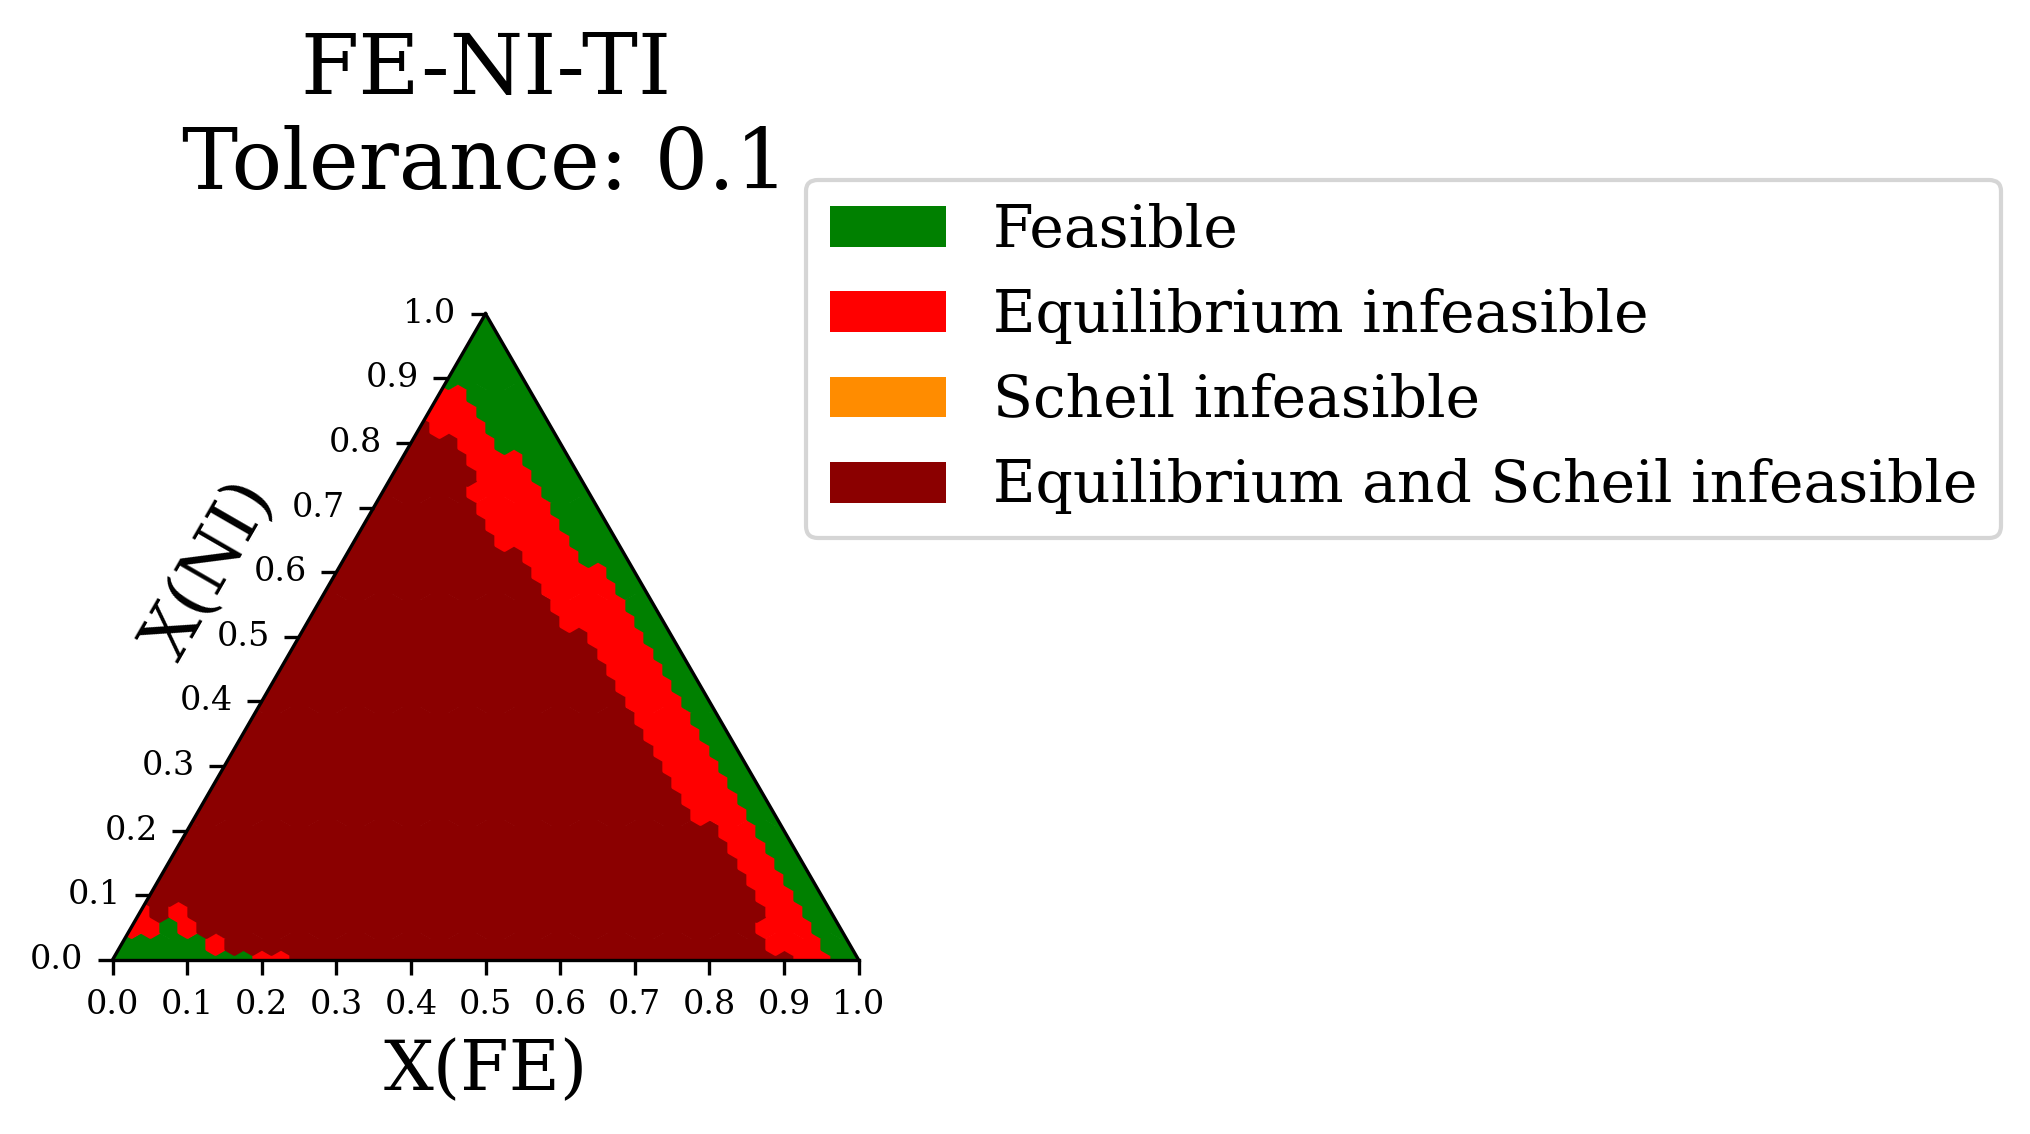

In [6]:
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases)
plt.style.use('papers-Copy1.mplstyle')
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}.pdf"), bbox_inches='tight')

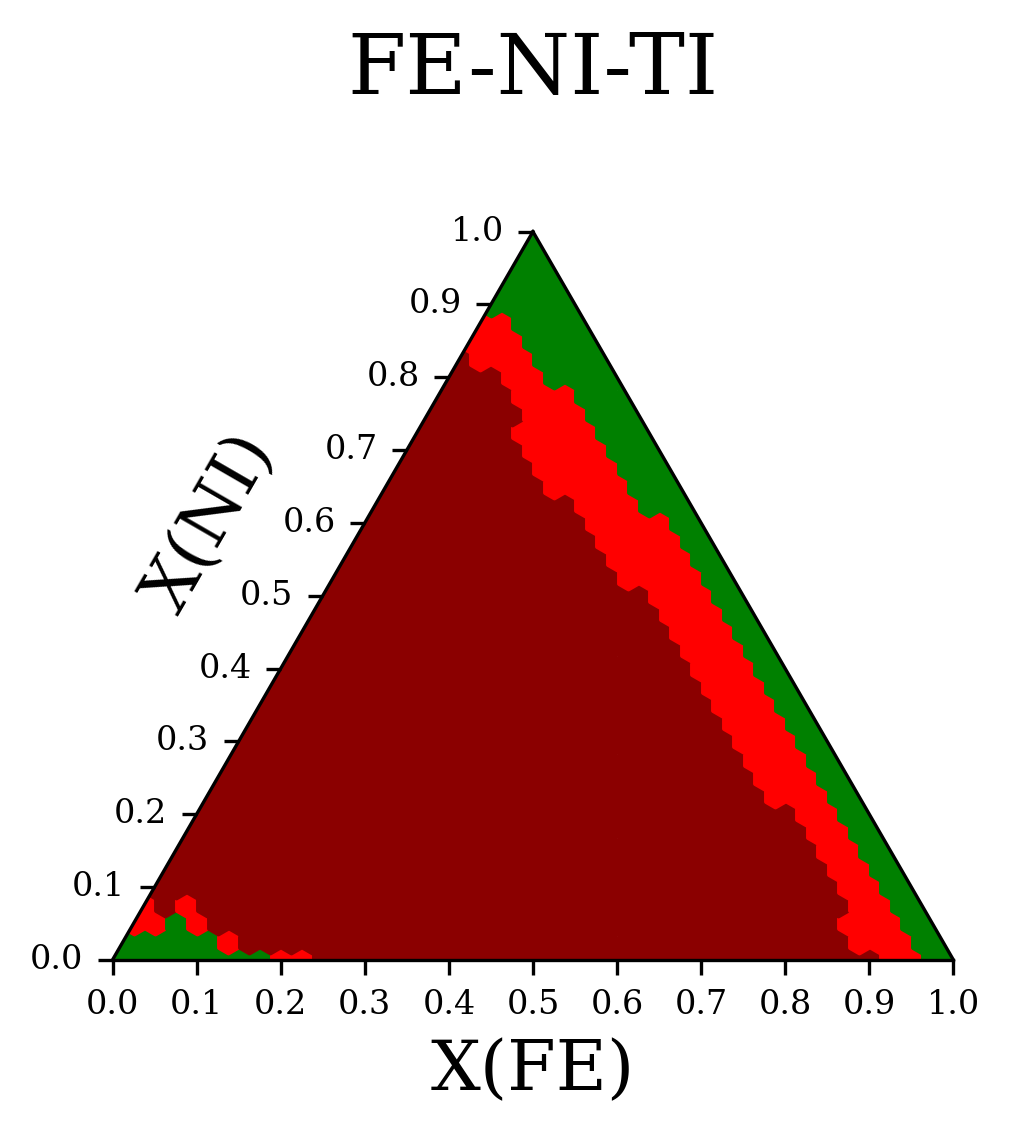

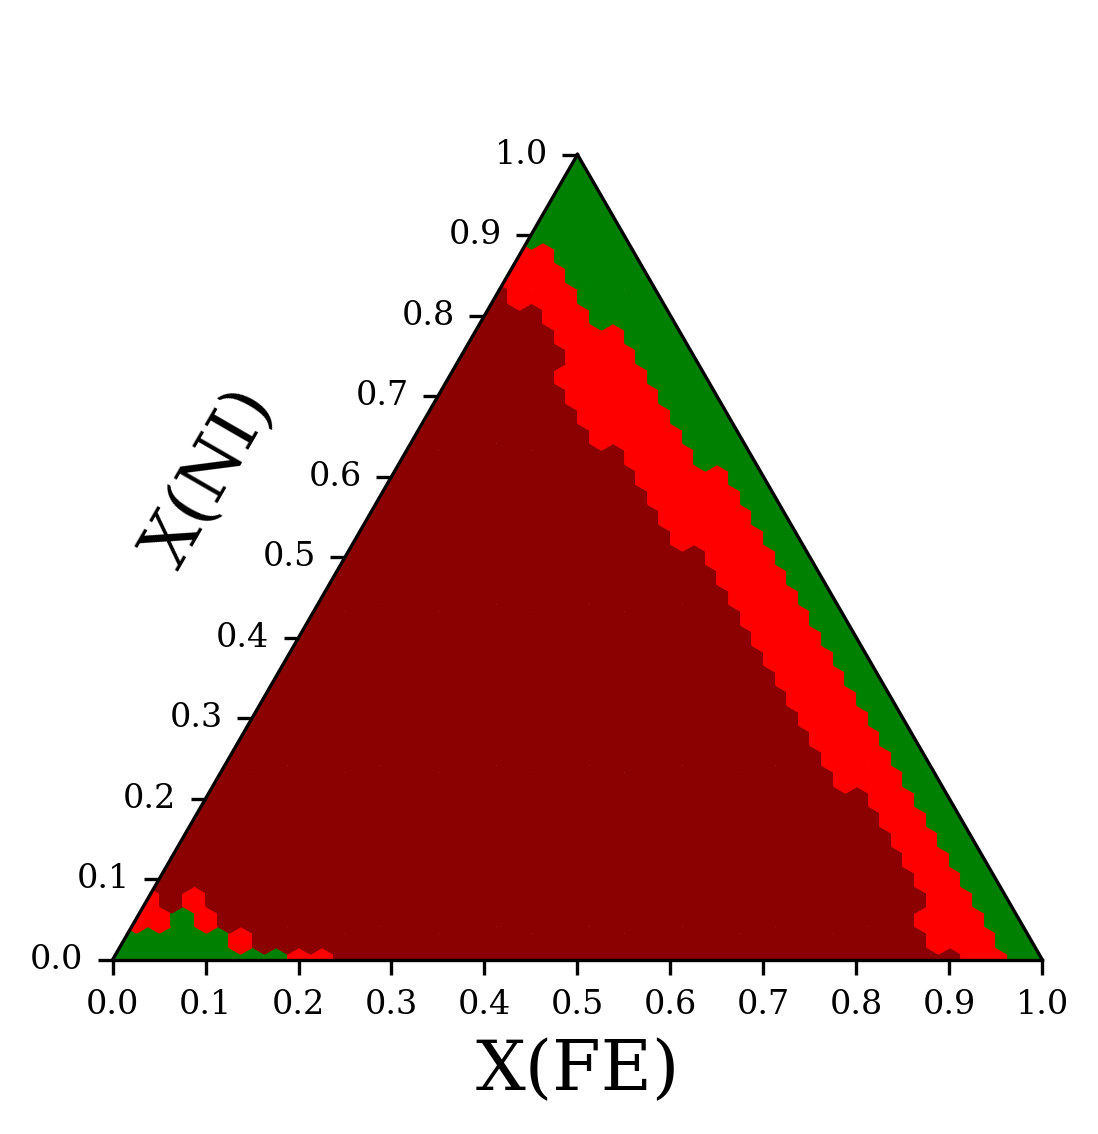

In [7]:
# with title
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases, scattersize=27)
ax.figure.legends[0].remove()
ax.set_title(f"{'-'.join(sorted(set(comps) - {'VA'}))}")
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}.pdf"), bbox_inches='tight')

# without title
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases, scattersize=33)
ax.figure.legends[0].remove()
ax.set_title("")
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}-notitle.pdf"), bbox_inches='tight')

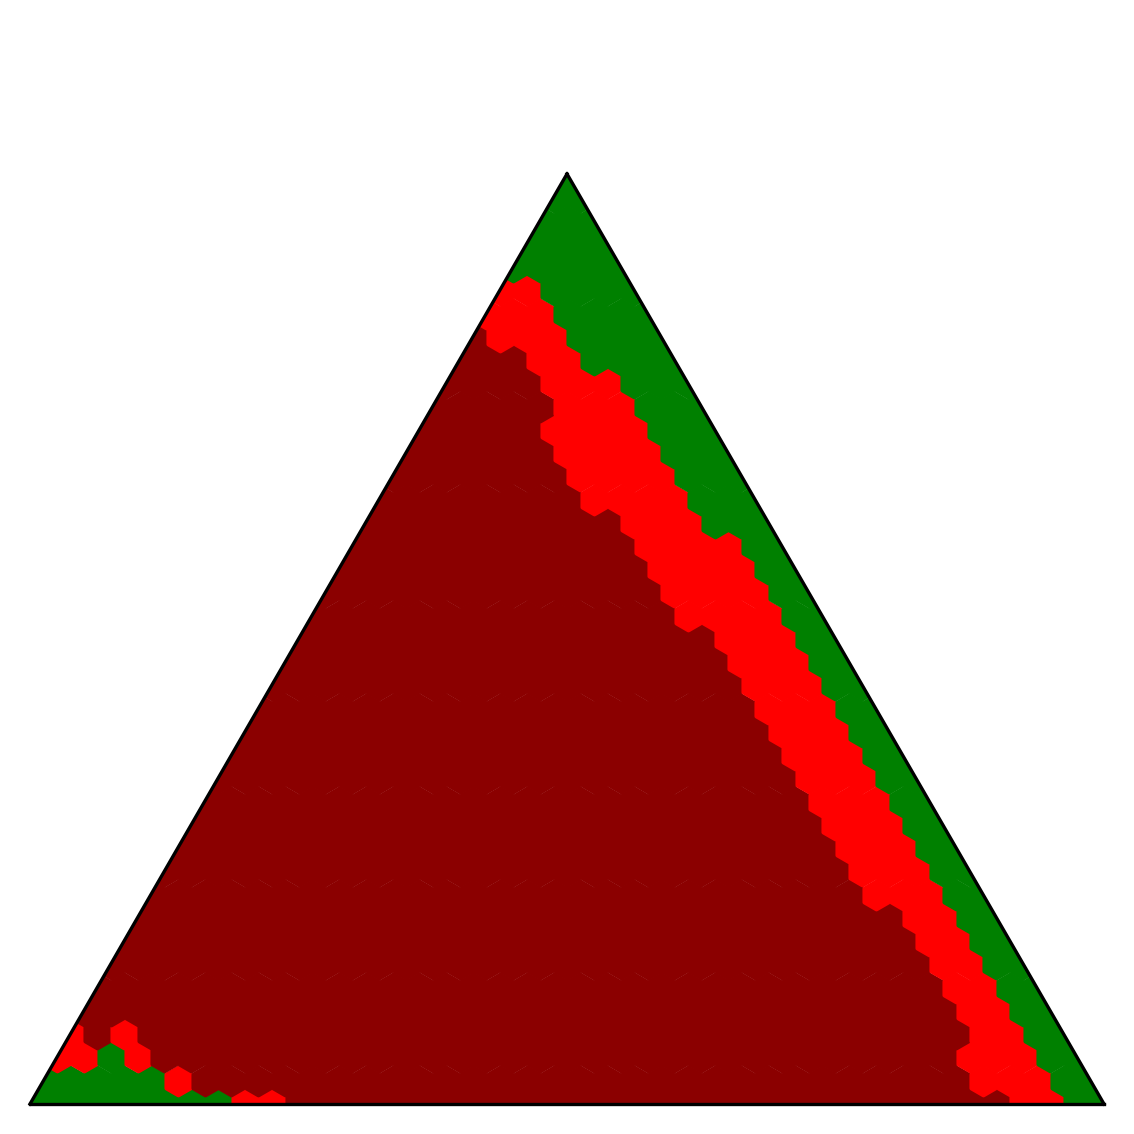

In [8]:
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases, scattersize=44)
ax.figure.legends[0].remove()
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}-clean.pdf"), bbox_inches='tight')

In [1]:
import os
import time

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pycalphad import Database, equilibrium, Model, variables as v
from pycalphad.core.calculate import _sample_phase_constitution
from pycalphad.core.utils import point_sample
from pycalphad.core.errors import DofError
from scheil import simulate_scheil_solidification
from feasibility_helpers import _build_composition_list, _build_mass_balanced_grid,  get_amount_disallowed_phases, get_amount_disallowed_phases_scheil

## User settings (edit these):
Be careful not to edit the variable names, because they are used below.


In [2]:
DATABASE_DIR = '../databases'
dbf = Database(os.path.join(DATABASE_DIR, 'Fe-Ni-Ti_dekeyzer2009.tdb'))
comps = ['FE', 'NI', 'TI', 'VA']
phases = list(dbf.phases.keys())

T_liquid = 2200  # temperature where everything is liquid
potentials = {v.N: 1, v.T: (1000, T_liquid, 10), v.P: 101325}  # for equilibrium calculations

indep_comps = [comps[1], comps[2]]  # choose them automatically
ngridpts = 21  # number of points along each dimension of the composition grid

allowed_phases = ['LIQUID', 'A2', 'A1', 'A3', 'BCC2', 'FCC4']  # phases that are okay to have (non-deleterious)
liquid_phase_name = 'LIQUID'
tolerance_deleterious_phases = 0.10  # Maximum tolerance for deleterious phases

ADAPTIVE_MODE = False
SAVE_TIME = True  # If true, don't perform more expensive feasibility tests (e.g. Scheil) if the composition is already known to be infeasible (e.g. from equilibrium)
OUTDIR = 'figures'

In [3]:
## For users: sanity check that T_liquid is in fact liquid at every composition

conds = {v.P: 101325, v.N: 1, v.T: T_liquid, v.X(comps[0]): (0, 1, 0.02), v.X(comps[1]): (0, 1, 0.02)}
eq_res = equilibrium(dbf, comps, phases, conds)
non_liquid_phases = sorted(set(map(str, set(eq_res.Phase.where(~eq_res.Phase.isin([liquid_phase_name, ''])).values.flatten().tolist()))) - {'nan'})
assert len(non_liquid_phases) == 0, f"Got non-liquid phases {non_liquid_phases} at {T_liquid}"

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/model.py:1058: UserWarning: The order-disorder model for "FCC4" has a contribution from the physical property model `magnetic_energy`. Partitioned physical properties are not correctly substituted into the disordered part of the energy. THE GIBBS ENERGY CALCULATED FOR THIS PHASE MAY BE INCORRECT. Please see the discussion in https://github.com/pycalphad/pycalphad/pull/311 for more details.
  warnings.warn(
/Users/brandon/Projects/Calphad/pycalphad/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in double_scalars
  result_array_GM_values[it.multi_index] = new_energy / molesum


## Script (should not need editing)

Setup

In [4]:
try:
    os.mkdir(OUTDIR)
except FileExistsError:
    pass
plt.style.use('papers.mplstyle')

# Generate points for adaptive Scheil starting points (performance)
if ADAPTIVE_MODE:
    points_dict = {}
    for phase_name in phases:
        try:
            mod = Model(dbf, comps, phase_name)
            points_dict[phase_name] = _sample_phase_constitution(mod, point_sample, True, 50)
        except DofError:
            pass
else:
    points_dict = None

# Build compositions to simulate over
grid_comps = _build_mass_balanced_grid(len(indep_comps), ngridpts)
compositions_list = _build_composition_list(indep_comps, grid_comps)

In [ ]:
# Run simulations
eq_results = []  # List[xarray.Dataset]
scheil_results = []  # List[Optional[scheil.SolidificationResult]]
for num, composition in enumerate(compositions_list):
    print(f"{composition} ({num+1}/{len(compositions_list)})")
    # Equilibrium calculation for feasibility
    conds = {v.P: 101325, v.N: 1, v.T: (1000, 2200, 10), **composition}
    tick = time.time()
    eq_res = equilibrium(dbf, comps, phases, conds)
    tock = time.time()
    eq_results.append(eq_res)
    eq_is_feasible = get_amount_disallowed_phases(eq_res, allowed_phases).max() < tolerance_deleterious_phases
    print(f'Equilibrium time: {tock - tick: 0.2f} s - {"feasible" if eq_is_feasible else "infeasible"}')

    if SAVE_TIME and not eq_is_feasible:
        scheil_results.append(None)  # ensure that the shapes of the results line up, even if we don't do this calculation
        continue
    # Scheil
    tick = time.time()
    if ADAPTIVE_MODE:
        sol_res = simulate_scheil_solidification(dbf, comps, phases, composition, T_liquid, adaptive=True, eq_kwargs={'calc_opts': {'points': points_dict}}, liquid_phase_name=liquid_phase_name)
    else:
        sol_res = simulate_scheil_solidification(dbf, comps, phases, composition, T_liquid, liquid_phase_name=liquid_phase_name)
    tock = time.time()
    scheil_results.append(sol_res)
    scheil_is_feasible = get_amount_disallowed_phases_scheil(sol_res, allowed_phases) < tolerance_deleterious_phases
    print(f'Scheil time: {tock - tick: 0.2f} s - {"feasible" if scheil_is_feasible else "infeasible"}')

print('Done simulating')

Run simulations

In [ ]:
# Run simulations
eq_results = []  # List[xarray.Dataset]
scheil_results = []  # List[Optional[scheil.SolidificationResult]]
for num, composition in enumerate(compositions_list):
    print(f"{composition} ({num+1}/{len(compositions_list)})")
    # Equilibrium calculation for feasibility
    conds = {v.P: 101325, v.N: 1, v.T: (1000, 2200, 10), **composition}
    tick = time.time()
    eq_res = equilibrium(dbf, comps, phases, conds)
    tock = time.time()
    eq_results.append(eq_res)
    eq_is_feasible = get_amount_disallowed_phases(eq_res, allowed_phases).max() < tolerance_deleterious_phases
    print(f'Equilibrium time: {tock - tick: 0.2f} s - {"feasible" if eq_is_feasible else "infeasible"}')

    if SAVE_TIME and not eq_is_feasible:
        scheil_results.append(None)  # ensure that the shapes of the results line up, even if we don't do this calculation
        continue
    # Scheil
    tick = time.time()
    sol_res = simulate_scheil_solidification(dbf, comps, phases, composition, T_liquid, adaptive=True, eq_kwargs={'calc_opts': {'points': points_dict}}, liquid_phase_name=liquid_phase_name)
    tock = time.time()
    scheil_results.append(sol_res)
    scheil_is_feasible = get_amount_disallowed_phases_scheil(sol_res, allowed_phases) < tolerance_deleterious_phases
    print(f'Scheil time: {tock - tick: 0.2f} s - {"feasible" if scheil_is_feasible else "infeasible"}')

print('Done simulating')

Plot feasibility on a ternary triangular diagram

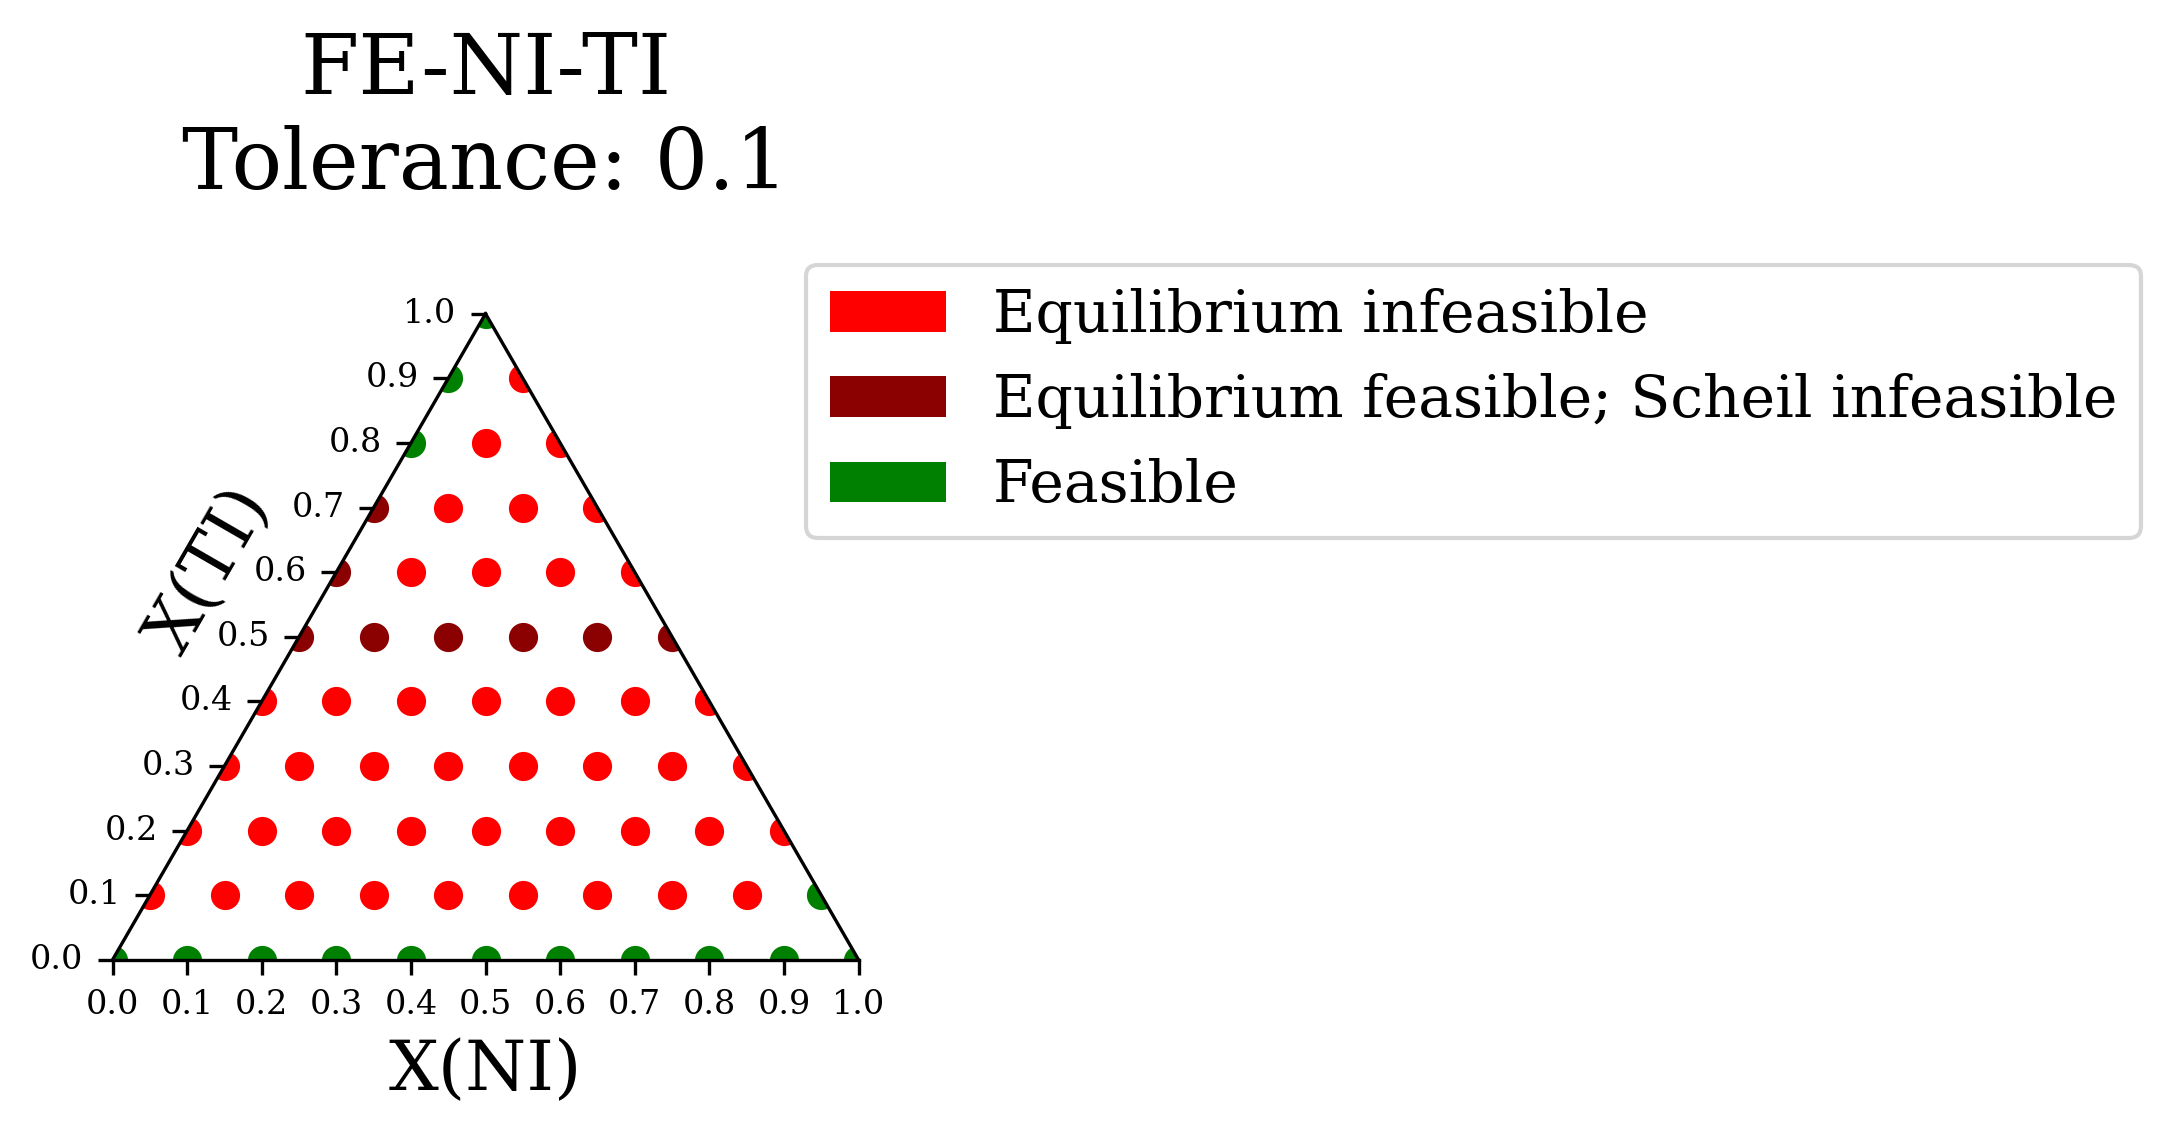

In [9]:
# Plot feasibility on a ternary triangular diagram
indep_comp_vars = [v.X(ic) for ic in indep_comps]
handles = [
    mpl.patches.Patch(facecolor='red'),
    mpl.patches.Patch(facecolor='darkred'),
    mpl.patches.Patch(facecolor='green'),
]
labels = [
    'Equilibrium infeasible',
    'Equilibrium feasible; Scheil infeasible',
    'Feasible',
]

fig = plt.figure()
ax = fig.add_subplot(projection='triangular')
for composition, eq_result, scheil_result in zip(compositions_list, eq_results, scheil_results):
    x_plot, y_plot = composition[indep_comp_vars[0]], composition[indep_comp_vars[1]]


    eq_is_feasible = get_amount_disallowed_phases(eq_result, ['LIQUID', 'A2', 'A1', 'A3', 'BCC2', 'FCC4']).max() < tolerance_deleterious_phases
    if not eq_is_feasible:
        ax.scatter(x_plot, y_plot, label='Equilibrium infeasible', c='red')
        continue

    assert scheil_result is not None, "Scheil calculation must exist to determine feasibility if equilibrium is feasible."
    scheil_is_feasible = get_amount_disallowed_phases_scheil(scheil_result, ['LIQUID', 'A2', 'A1', 'A3', 'FCC4']) < tolerance_deleterious_phases
    if not scheil_is_feasible:
        ax.scatter(x_plot, y_plot, label='Equilibrium feasible; Scheil infeasible', c='darkred')
        continue

    ax.scatter(x_plot, y_plot, label='Equilibrium and Scheil feasible', c='green')

fmtted_comps = '-'.join(sorted(set(comps) - {'VA'}))
ax.set_title(f"{fmtted_comps}\nTolerance: {tolerance_deleterious_phases}")
ax.set_xlabel(f'X({indep_comps[0]})')
ax.set_ylabel(f'X({indep_comps[1]})', labelpad=-50)
fig.legend(handles=handles, labels=labels, loc='lower left', bbox_to_anchor=(0.45, 0.5))
ax.tick_params(labelsize=8)

fig.savefig(os.path.join(OUTDIR, f'{fmtted_comps}-nob2.pdf'), bbox_inches='tight')